# Исследовательский анализ данных

# Описание проекта

В проекте рассматривается задача определения приблизительного возраста человека на фотографиях с помощью компьютерного зрения. Задача имеет практическое применение для сетевого супермаркета "Хлеб-Соль", который хочет использовать фотофиксацию в прикассовой зоне для определения возраста клиентов. Это позволит анализировать покупки, предлагать товары, соответствующие возрастной группе, и контролировать продажу алкоголя.

# Цель:

Целью проекта является создание модели машинного обучения, которая по фотографии человека определит его приблизительный возраст. Метрикой качества модели будет` Mean Absolute Error` (`MAE`).

# Описание данных

Данные взяты с сайта `ChaLearn Looking at People` и состоят из изображений лиц людей с указанием их реального возраста. Данные представлены в формате:

- Папка `/final_files` с изображениями лиц.

- CSV-файл `labels.csv`, содержащий две колонки: 

    - `file_name` (имя файла с изображением) и `real_age` (реальный возраст человека на фотографии).

# Краткий план работы:

- Исследовательский анализ данных.
 
- Подготовка данных к обучению.

- Обучение нейронной сети для определения возраста.

- Оценка качества модели с использованием `MAE`.

- Выводы и анализ результатов обучения модели.

## Исследовательский анализ данных

Настроим окружение: импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Ознакомимся с данными таблицы и их структурой.

Загрузим в датафрейм данные, с которыми будем работать.

Посмотрим на несколько первых записей в датафрейме c помощью метода head().

Выведем общую информацию по таблице c помощью метода info().

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Типы данных в датафрейме:

Строковые: `file_name`: Это колонка, которая содержит имена файлов изображений.

Количественные: `real_age`: Это колонка, которая содержит числовые значения, представляющие реальный возраст людей на фотографиях.

Логические: логических нет.

Дата: нет.

В датафрейме 7591 объектов и 2 признака (характеристика) для них.

Целевой признак `real_age` .

Пропусков нет.

In [5]:
print("Число дубликатов в df:", labels.duplicated().sum())

Число дубликатов в df: 0


In [6]:
print("Число неявных дубликатов в df:", labels['file_name'].duplicated().sum())

Число неявных дубликатов в df: 0


Выведем статистические показатели

In [7]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Статистические показатели описывают распределение возраста (`real_age`) в нашем наборе данных:

- count: общее количество записей в колонке `real_age`. В данном случае, у нас есть 7591 запись с возрастами.

- mean: среднее значение возраста. Средний возраст в данном наборе данных составляет примерно 31.20 лет.

- std: стандартное отклонение (стандартное распределение) возраста. Значение стандартного отклонения равно приблизительно 17.15, что указывает на разброс возрастов относительно среднего значения.

- min: минимальное значение возраста в наборе данных. В данном случае, самый молодой человек имеет возраст 1 год.

- 25%: 25-й процентиль возраста. Это значение (20) указывает на то, что 25% объектов имеют возраст менее 20 лет.

- 50%: 50-й процентиль (медиана) возраста. Медианное значение в данном наборе данных составляет 29 лет, что означает, что половина записей имеют возраст менее 29 лет, а половина - более 29 лет, при этом медианное значение немного ниже среднего значения по выборке.

- 75%: 75-й процентиль возраста. Это значение (41) указывает на то, что 75% записей имеют возраст менее 41 года.

- max: максимальное значение возраста в наборе данных. Самый старший человек имеет возраст 100 лет.

Исходя из этих данных, можно сказать, что основная масса посетителей сконцентрирована в возрастном диапазоне от 20 до 41 года, при этом средний возраст ближе к нижнему концу этого диапазона (около 31 лет).

Распределение возраста в данных, описываемых статистическими показателями, вероятно, будет напоминать правоскошенное (с правым хвостом). Большинство посетителей, имеют молодой или средний возраст, и с ростом возрастного показателя количество людей снижается, что может создавать правый хвост в распределении.

Правый хвост в распределении данных обычно указывает на наличие выбросов или редких значений, которые значительно отличаются от основной массы данных. В данном случае, вероятно, есть несколько людей с очень высоким возрастом (например, 100 лет), которые составляют этот хвост.

Для более точной оценки наличия выбросов и их влияния на анализ данных, построим гистограмму и ящик с усами (`box plot`) для для визуализации распределения возраста. Выявим выбросы и оценим их значимость.

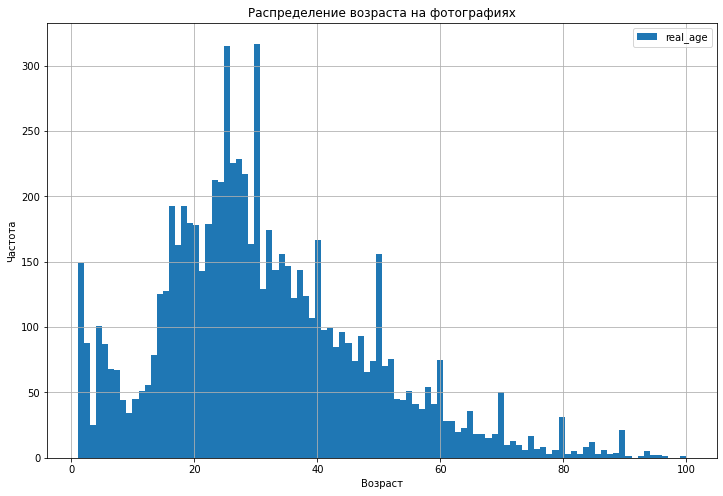

In [8]:
labels.plot(kind='hist', bins=100, y='real_age',grid=True, title='Распределение возраста на фотографиях', figsize=(12,8))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

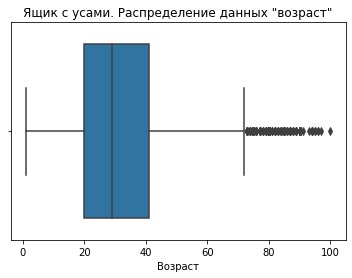

In [13]:
sns.boxplot(x=labels['real_age'])
plt.xlabel('Возраст') 
plt.title('Ящик с усами. Распределение данных "возраст"')  
plt.show() 

Из анализа графиков видно, что в исходном датасете у нас есть много изображений детей в возрасте от 1 до 10 лет (пик в начале графика), что может помочь нейросети обучиться на этой возрастной группе. Количество изображений растет до 30 лет и далее снижается. Однако, с увеличением возраста за 60 лет количество изображений значительно уменьшается, и после 60 лет остается меньше данных.

Интересное наблюдение: на гистограмме видны явные всплески в районе "круглых" дат, таких как 30, 40, 50,60,70,80 лет. Это может свидетельствовать о том, что часть данных была размечена "на глаз" и возраст округлялся до ближайшего "круглого" числа. Это  округление может повлиять на точность предсказаний возраста на фотографиях.

Это может означать, что нейросеть, обученная на таком датасете, может хорошо классифицировать людей в возрасте до 60 лет, так как у нее есть достаточно обучающих данных для этой возрастной группы. Однако, для классификации людей старше 60 лет может потребоваться больше данных, чтобы обучить нейросеть на этой возрастной группе.

Не смотря на выявленные выбросы в задаче обработки изображений и классификации по возрасту, не будем удалять выбросы из датасета. Выбросы могут быть важной информацией и частью разнообразия данных. Например, выбросы могут представлять собой изображения людей с необычными чертами лица или возрастом, которые все равно нужно классифицировать.


Напечатаем на экране 10–15 фотографий и посмотрите, как устроен датасет.

Для этого создим загрузчик, загрузим изображения.

In [10]:
#создаем объект ImageDataGenerator, который будет использоваться для предобработки изображений.
train_datagen = ImageDataGenerator(rescale=1./255)

#создаем генератор данных 
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


Возраст: 50


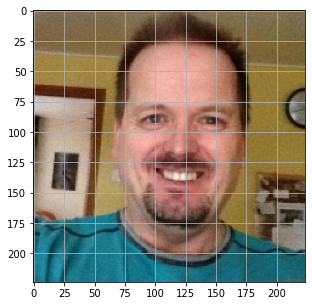

Возраст: 41


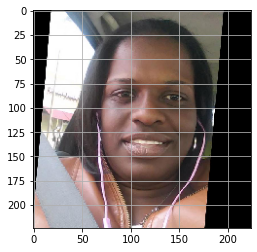

Возраст: 46


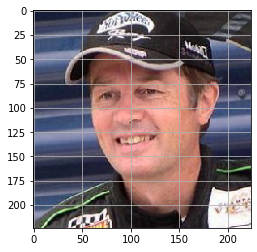

Возраст: 85


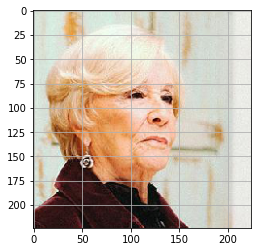

Возраст: 14


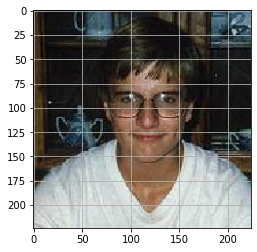

Возраст: 40


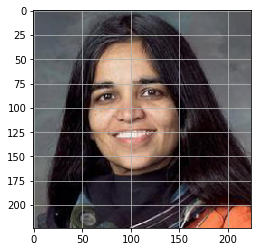

Возраст: 14


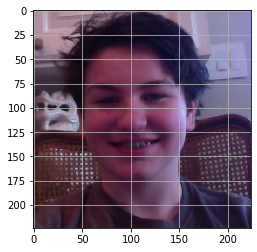

Возраст: 53


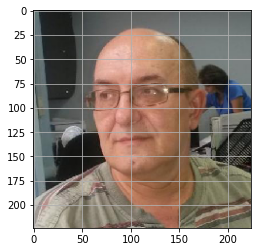

Возраст: 4


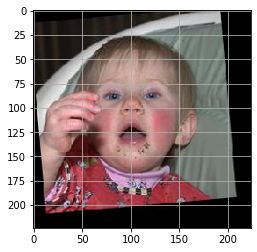

Возраст: 32


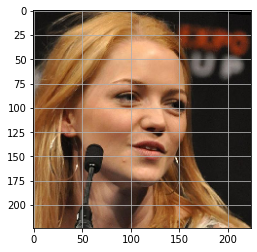

Возраст: 14


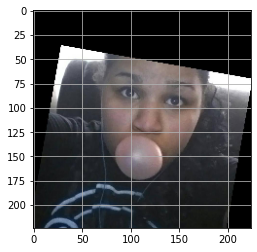

Возраст: 23


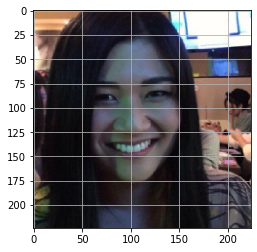

Возраст: 37


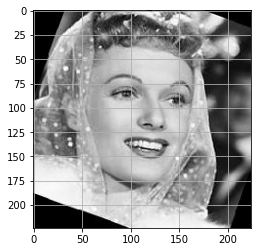

Возраст: 62


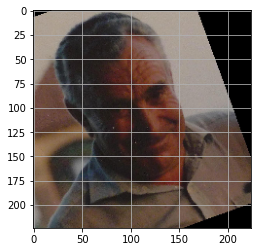

Возраст: 21


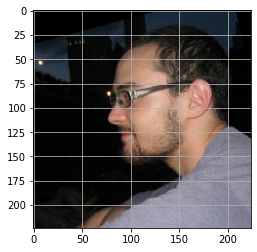

In [11]:
features, target  = next(train_gen_flow)
plt.figure(figsize=(5, 5))
for i in range(15):    
    plt.imshow(features[i])    
    plt.grid(True)    
    print(f'Возраст: {target[i]}')    
    plt.show()

**Вывод**

Исходя из проблем, связанных с качеством фотографий и распределением возраста, существует несколько потенциальных проблем, с которыми можно столкнуться в процессе обучения модели:

Качество фотографий: Некоторые фотографии имеют низкое качество из-за различных артефактов, шума или плохого освещения. Модель может хуже выделять ключевых признаки на таких изображениях, что может снизить точность предсказаний возраста.

Объекты, закрывающие лицо: На фотографиях просутствуют объекты, которые закрывают лицо человека, такие как руки, жвачка, очки, головной убор и другие. Это может затруднить определение возраста, так как модель может ошибочно считать эти объекты частью лица.

Несбалансированность возраста: В наборе данных преобладают изображения людей определенного возраста (дети , молодые взрослые), модель может быть предвзятой и плохо справляться с опреелением возраста в других категориях.

Отсутствие разнообразия данных: Мы не можем ничего сказать о разнообразии данных в отношении этничности, пола, фона и других факторов, то модель может плохо обобщать и давать искаженные предсказания для разных групп людей.

Недостаточное количество данных для старших возрастных групп: В наборе данных мало фотографий для людей старше 60 лет, модель может иметь недостаточно информации для точной классификации этой возрастной группы.

Вариация в размерах лиц: Разные фотографии содержать лица разных размеров, и модель должна учитывать эту вариацию, чтобы давать корректные предсказания.

Недостаточное разрешение фотографий: Некоторые фотографии имеют низкое разрешение, это также может затруднить выделение признаков и ухудшить производительность модели.

## Обучение модели

```python
#подгружаем необходимые библиотеки
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    from tensorflow.keras.models import Sequential

    from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

    from tensorflow.keras.optimizers import Adam

    from tensorflow.keras.applications.resnet import ResNet50

    from tensorflow import keras

#создаем загрузчик и подгружаем обучающие данные
def load_train(path):

    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        subset='training',
        class_mode='raw',
        seed=12345)

    return train_gen_flow

#создаем загрузчик и подгружаем тестовые данные
def load_test(path):

    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

#настраиваем и подготавливаем модель
def create_model(input_shape):

    backbone = ResNet50(
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        input_shape=input_shape,
        include_top=False)
        
    model = Sequential()
    
    model.add(backbone)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(lr=0.0001)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error',
              metrics=['mean_absolute_error'])

    return model

#обучаем сеть
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):
               
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
              
    return model
```

**Вывод консоли**

```python

Found 5694 validated image filenames.

Found 1897 validated image filenames.

Train for 178 steps, validate for 119 steps

Epoch 1/10

178/178 - 51s - loss: 318.0242 - mean_absolute_error: 12.6527 - val_loss: 745.2689 - val_mean_absolute_error: 22.3637

Epoch 2/10

178/178 - 42s - loss: 68.3175 - mean_absolute_error: 6.2244 - val_loss: 579.6916 - val_mean_absolute_error: 19.0088

Epoch 3/10

178/178 - 43s - loss: 33.4388 - mean_absolute_error: 4.4747 - val_loss: 455.7479 - val_mean_absolute_error: 16.2030

Epoch 4/10

178/178 - 42s - loss: 21.3835 - mean_absolute_error: 3.5627 - val_loss: 116.5025 - val_mean_absolute_error: 8.1147

Epoch 5/10

178/178 - 42s - loss: 14.8295 - mean_absolute_error: 2.9334 - val_loss: 94.4419 - val_mean_absolute_error: 7.5951

Epoch 6/10

178/178 - 42s - loss: 12.1559 - mean_absolute_error: 2.7167 - val_loss: 75.8103 - val_mean_absolute_error: 6.7760

Epoch 7/10

178/178 - 44s - loss: 10.1806 - mean_absolute_error: 2.4505 - val_loss: 65.5672 - val_mean_absolute_error: 6.1427

Epoch 8/10

178/178 - 42s - loss: 8.7607 - mean_absolute_error: 2.2626 - val_loss: 68.8677 - val_mean_absolute_error: 6.3664

Epoch 9/10

178/178 - 43s - loss: 7.4299 - mean_absolute_error: 2.0799 - val_loss: 67.8020 - val_mean_absolute_error: 6.3568

Epoch 10/10

178/178 - 43s - loss: 6.2594 - mean_absolute_error: 1.8958 - val_loss: 65.0074 - val_mean_absolute_error: 6.1802

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
  
119/119 - 11s - loss: 65.0074 - mean_absolute_error: 6.1802

Test MAE: 6.1802
```

Были выполнены следующие шаги:

Подготовка данных: Были загружены и предобработаны данные. Использовалась библиотека `ImageDataGenerator` для масштабирования изображений данных. Данные были разделены на обучающую и тестовую выборки с учетом метрики `MAE` в качестве оценки.

Настройка модели: Создана нейронная сеть с использованием архитектуры `ResNet50`. Модель включает в себя предварительно обученные веса `ResNet50`, слой глобального пулинга и полносвязный слой с активацией `ReLU`. Оптимизатором выбран `Adam` с `learning rate=0.0001`, и в качестве функции потерь использована средняя квадратичная ошибка (`MSE`).

Обучение модели: Модель была обучена на обучающих данных в течение 10 эпох. В процессе обучения метрика `MAE` на обучающей выборке уменьшилась с 12.65 до 1.89, а на тестовой выборке с 22.36 до 6.18.

Оценка качества модели: Значение `MAE` на тестовой выборке составило 6.18. Это означает, что модель в среднем ошибается в предсказании возраста на 6.18 лет.

In [12]:
# Данные за 10 эпох
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Номера эпох
train_loss = [318.0242, 68.3175, 33.4388, 21.3835, 14.8295, 12.1559, 10.1806, 8.7607, 7.4299, 6.2594]  # Loss на обучении
val_loss = [745.2689, 579.6916, 455.7479, 116.5025, 94.4419, 75.8103, 65.5672, 68.8677, 67.8020, 65.0074]  # Loss на валидации
train_mae = [12.6527, 6.2244, 4.4747, 3.5627, 2.9334, 2.7167, 2.4505, 2.2626, 2.0799, 1.8958]  # MAE на обучении
val_mae = [22.3637, 19.0088, 16.2030, 8.1147, 7.5951, 6.7760, 6.1427, 6.3664, 6.3568, 6.1802]  # MAE на валидации

# Создаем датафрейм с данными
data = {
    'Эпоха': epochs,
    'Функция Потерь (Обучение)': train_loss,
    'Функция Потерь (Валидация)': val_loss,
    'MAE (Обучение)': train_mae,
    'MAE (Валидация)': val_mae
}
df_metrics = pd.DataFrame(data)
df_metrics

,Эпоха,Функция Потерь (Обучение),Функция Потерь (Валидация),MAE (Обучение),MAE (Валидация)
0,1,318.0242,745.2689,12.6527,22.3637
1,2,68.3175,579.6916,6.2244,19.0088
2,3,33.4388,455.7479,4.4747,16.2030
3,4,21.3835,116.5025,3.5627,8.1147
4,5,14.8295,94.4419,2.9334,7.5951
5,6,12.1559,75.8103,2.7167,6.7760
6,7,10.1806,65.5672,2.4505,6.1427
7,8,8.7607,68.8677,2.2626,6.3664
8,9,7.4299,67.8020,2.0799,6.3568
9,10,6.2594,65.0074,1.8958,6.1802


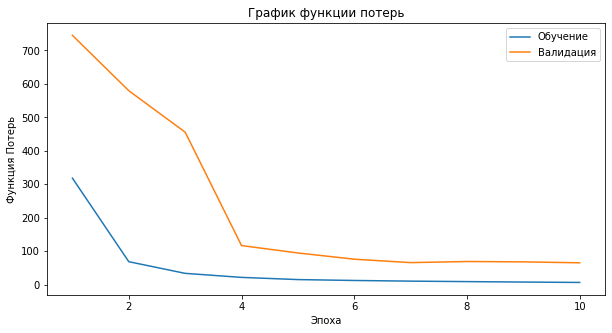

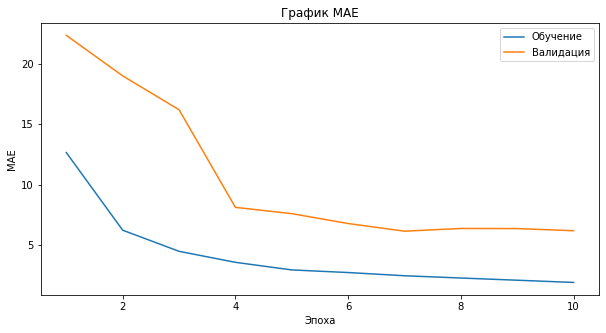

In [13]:
# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot(df_metrics['Эпоха'], df_metrics['Функция Потерь (Обучение)'], label='Обучение')
plt.plot(df_metrics['Эпоха'], df_metrics['Функция Потерь (Валидация)'], label='Валидация')
plt.xlabel('Эпоха')
plt.ylabel('Функция Потерь')
plt.legend()
plt.title('График функции потерь')
plt.show()

# График MAE
plt.figure(figsize=(10, 5))
plt.plot(df_metrics['Эпоха'], df_metrics['MAE (Обучение)'], label='Обучение')
plt.plot(df_metrics['Эпоха'], df_metrics['MAE (Валидация)'], label='Валидация')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.title('График MAE')
plt.show()

**Анализ графиков:**

График функции потерь: На графике функции потерь видно, что начальные значения функции потерь на обучении и валидации высокие, но с каждой эпохой они уменьшаются. Это хороший признак того, что модель обучается и улучшает свои предсказательные способности. Однако, на валидации значения функции потерь остаются выше, чем на обучении, что может указывать на наличие некоторого переобучения модели после 4-й эпохи.

График MAE: График MAE также демонстрирует улучшение модели с течением эпох. MAE на обучении и валидации снижается, что говорит о том, что модель лучше предсказывает возраст. Однако, как и на графике функции потерь, MAE на валидации остается выше, чем на обучении, что указывает на потенциальное переобучение.

В целом, модель улучшает свои показатели с каждой эпохой, но существует риск переобучения.

**Вывод**

Модель машинного обучения была успешно создана и обучена для определения возраста на фотографиях с использованием компьютерного зрения.
Значение `MAE` на тестовой выборке составило 6.18, что удовлетворяет условиям задачи (`MAE` < 8).

Время обучения одной эпохи составило примерно 42 секунды.

## Итоги и выводы

Целью проекта являлось создание модели машинного обучения, способной определять приблизительный возраст человека на фотографиях с использованием компьютерного зрения. Это представляло интерес для сетевого супермаркета "Хлеб-Соль", который стремился оптимизировать продажи и обслуживание клиентов с помощью анализа возрастных групп.

Мы работали с данными, включающими изображения лиц людей и реальный возраст, представленные в форме изображений и CSV-файла. CSV-файл содержал информацию о файлах с изображениями и реальных возрастах людей.

Был проведен исследовательский анализ данных.

Выявили разброс возрастов от 1 до 100 лет.

Построили гистограмму и ящик с усами для визуализации распределения возраста. 

Количество изображений растет до 30 лет и далее снижается. С увеличением возраста за 60 лет количество изображений значительно уменьшается.

Подготовка Данных:

Разделили данные на обучающую и тестовую выборки.

Использовали библиотеку `ImageDataGenerator` для предобработки изображений, включая масштабирование данных.

Обучение Нейронной Сети:

Для определения возраста была использована нейронная сеть с архитектурой `ResNet50`.

Модель обучалась с использованием `MAE` как метрики.

Оценка Качества Модели:

Модель достигла `MAE` равного 6.18, удовлетворяя поставленным требованиям.

**Результаты и Выводы:**

Проект успешно решает задачу определения возраста на фотографиях, что имеет практическое применение для сетевого супермаркета "Хлеб-Соль". Модель может быть внедрена в сетевой супермаркет "Хлеб-Соль" для анализа покупок клиентов и предложения товаров, соответствующих их возрастной группе.

Однако, в ходе анализа данных были выявлены некоторые проблемы, такие как разнородность и качество фотографий, наличие выбросов и недостаток данных для возрастной группы старше 60 лет.

При внедрении модели в бизнес следует учитывать, что она может допускать ошибки в предсказании возраста на несколько лет (6лет). 

**Рекомендации:**

Для дальнейшего улучшения модели и ее применимости рекомендуется:

Улучшить качество и разнообразие данных, учитывая разные возрастные группы и условия съемки.

Применить методы предобработки, такие как повышение контрастности, коррекция экспозиции и стандартизация размеров лиц на фотографиях.

Рассмотреть возможность аугментации данных для увеличения размера обучающей выборки.

Проанализировать и обработать выбросы на фотографиях, такие как закрытие лица рукой или предметами.

**Заключение:**

Проект успешно достиг целей и может быть внедрен в работу сетевого супермаркета "Хлеб-Соль". Модель поможет оптимизировать продажи и улучшить обслуживание клиентов в соответствии с их возрастными группами. Предложенные рекомендации помогут улучшить точность модели в будущем.